# check best performing model

In [1]:
# load the model from disk

import pickle

path = r'Result/corr cutoff 0.7 single/RF model/'

AtomPairs2DFingerprintCount = pickle.load(open(path +'AtomPairs2DFingerprintCount.csv_model0.sav', 'rb'))
AtomPairs2DFingerprinter	= pickle.load(open(path +'AtomPairs2DFingerprinter.csv_model0.sav', 'rb'))
EStateFingerprinter			= pickle.load(open(path +'EStateFingerprinter.csv_model0.sav', 'rb'))
ExtendedFingerprinter		= pickle.load(open(path +'ExtendedFingerprinter.csv_model0.sav', 'rb'))
Fingerprinter				= pickle.load(open(path +'Fingerprinter.csv_model0.sav', 'rb'))
GraphOnlyFingerprinter		= pickle.load(open(path +'GraphOnlyFingerprinter.csv_model0.sav', 'rb'))
KlekotaRothFingerprintCount = pickle.load(open(path +'KlekotaRothFingerprintCount.csv_model0.sav', 'rb'))
KlekotaRothFingerprinter	= pickle.load(open(path +'KlekotaRothFingerprinter.csv_model0.sav', 'rb'))
MACCSFingerprinter			= pickle.load(open(path +'MACCSFingerprinter.csv_model0.sav', 'rb'))
PubchemFingerprinter		= pickle.load(open(path +'PubchemFingerprinter.csv_model0.sav', 'rb'))
SubstructureFingerprintCount= pickle.load(open(path +'SubstructureFingerprintCount.csv_model0.sav', 'rb'))
SubstructureFingerprinter	= pickle.load(open(path +'SubstructureFingerprinter.csv_model0.sav', 'rb'))


model 9 show best prefance

# testing external

In [2]:
import pandas as pd
import numpy as np

df1  = pd.read_csv('model/Test_gra_ER_alpha.csv' , header = 0)
df2  = pd.read_csv('model/Test_les_ER_alpha.csv' , header = 0)

In [3]:
len(df1),len(df2)

(283, 19)

In [4]:
# Convert IC50 to pIC 50

from math import log10

def pIC50(df0):
    pIC50 = []

    for i in df0.value:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-log10(molar))
    #Y = pIC50

    df0['pIC50'] = pIC50
    df0 = df0.drop('value', 1)
        
    return df0

In [5]:
df1 = pIC50(df1)
df2 = pIC50(df2)

In [6]:
path = r'Fingerprint/'

Fp1  = pd.read_csv(path + 'Test_gra_ER_alpha-SubstructureFingerprintCount.csv'  , header = 0)
Fp2  = pd.read_csv(path + 'Test_les_ER_alpha-SubstructureFingerprintCount.csv'  , header = 0)

In [7]:
Fp1 = Fp1.rename(columns = {'Name':'chemblId'})
Fp2 = Fp2.rename(columns = {'Name':'chemblId'})

In [8]:
from sklearn import preprocessing

def normalized (Fp):
    
    chemblId = Fp.chemblId
    Fp_ix = Fp.ix[:,1:]
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp_ix)
    Fp_normalized = pd.DataFrame(np_scaled)
    Fp_normalized
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp_ix.columns)
    Fp_normalized['chemblId'] = chemblId
    
    return Fp_normalized

In [9]:
Fp1_n  = normalized (Fp1 )
Fp2_n  = normalized (Fp2 )

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [10]:
raw1  = df1.merge(Fp1_n , on='chemblId', how='outer')
raw2  = df2.merge(Fp2_n , on='chemblId', how='outer')

In [11]:
raw1 .to_csv('QSAR/Test_gra_ER_alpha.csv' , sep=',' ,index=False)
raw2 .to_csv('QSAR/Test_les_ER_alpha.csv' , sep=',' ,index=False)

In [12]:
Ext1  = raw1 [['chemblId', 'pIC50'
             ,'SubFPC169', 'SubFPC23', 'SubFPC274', 'SubFPC302', 'SubFPC88', 'SubFPC181', 'SubFPC2', 'SubFPC18', 'SubFPC287', 'SubFPC137', 'SubFPC1', 'SubFPC20', 'SubFPC5', 'SubFPC172', 'SubFPC135', 'SubFPC182', 'SubFPC100', 'SubFPC3', 'SubFPC183', 'SubFPC33']]
Ext2  = raw2 [['chemblId', 'pIC50'
             ,'SubFPC169', 'SubFPC23', 'SubFPC274', 'SubFPC302', 'SubFPC88', 'SubFPC181', 'SubFPC2', 'SubFPC18', 'SubFPC287', 'SubFPC137', 'SubFPC1', 'SubFPC20', 'SubFPC5', 'SubFPC172', 'SubFPC135', 'SubFPC182', 'SubFPC100', 'SubFPC3', 'SubFPC183', 'SubFPC33']]

In [13]:
Ext1.head(2)

,chemblId,pIC50,SubFPC169,SubFPC23,SubFPC274,SubFPC302,SubFPC88,SubFPC181,SubFPC2,SubFPC18,...,SubFPC1,SubFPC20,SubFPC5,SubFPC172,SubFPC135,SubFPC182,SubFPC100,SubFPC3,SubFPC183,SubFPC33
0,CHEMBL192325,5.30103,0.666667,0.0,0.461538,0.008772,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.0,0.0,0.0
1,CHEMBL1331671,4.30103,0.000000,0.0,0.653846,0.035088,0.05,0.4,0.0,0.0,...,0.1,0.0,0.0,0.0,0.4,0.5,0.055556,0.0,0.0,0.0


In [14]:
X_pre = Ext1.ix[:,2:]
X_pre = X_pre.as_matrix()
X_pre = np.array(X_pre)
X_ext = X_pre

Y_ext = Ext1["pIC50"].tolist()

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score

#Test_score = loaded_model.score(X_ext, Y_ext)
AtomPairs2DFingerprintCount.predict(X_ext)
AtomPairs2DFingerprinter.predict(X_ext)
EStateFingerprinter.predict(X_ext)
ExtendedFingerprinter.predict(X_ext)
Fingerprinter.predict(X_ext)
GraphOnlyFingerprinter.predict(X_ext)
KlekotaRothFingerprintCount.predict(X_ext)
KlekotaRothFingerprinter.predict(X_ext)
MACCSFingerprinter.predict(X_ext)
PubchemFingerprinter.predict(X_ext)
SubstructureFingerprintCount.predict(X_ext)
SubstructureFingerprinter.predict(X_ext)


prediction_ext1  = AtomPairs2DFingerprintCount.predict(X_ext)
prediction_ext2  = AtomPairs2DFingerprinter.predict(X_ext)
prediction_ext3  = EStateFingerprinter.predict(X_ext)
prediction_ext4  = ExtendedFingerprinter.predict(X_ext)
prediction_ext5  = Fingerprinter.predict(X_ext)
prediction_ext6  = GraphOnlyFingerprinter.predict(X_ext)
prediction_ext7  = KlekotaRothFingerprintCount.predict(X_ext)
prediction_ext8  = KlekotaRothFingerprinter.predict(X_ext)
prediction_ext9  = MACCSFingerprinter.predict(X_ext)
prediction_ext10 = PubchemFingerprinter.predict(X_ext)
prediction_ext11 = SubstructureFingerprintCount.predict(X_ext)
prediction_ext12 = SubstructureFingerprinter.predict(X_ext)


ext    = pd.DataFrame(Y_ext, columns=['Y_ext'])
Pext1  = pd.DataFrame(prediction_ext1 , columns=['pred Model 1 '])
Pext2  = pd.DataFrame(prediction_ext2 , columns=['pred Model 2 '])
Pext3  = pd.DataFrame(prediction_ext3 , columns=['pred Model 3 '])
Pext4  = pd.DataFrame(prediction_ext4 , columns=['pred Model 4 '])
Pext5  = pd.DataFrame(prediction_ext5 , columns=['pred Model 5 '])
Pext6  = pd.DataFrame(prediction_ext6 , columns=['pred Model 6 '])
Pext7  = pd.DataFrame(prediction_ext7 , columns=['pred Model 7 '])
Pext8  = pd.DataFrame(prediction_ext8 , columns=['pred Model 8 '])
Pext9  = pd.DataFrame(prediction_ext9 , columns=['pred Model 9 '])
Pext10 = pd.DataFrame(prediction_ext10, columns=['pred Model 10'])
Pext11 = pd.DataFrame(prediction_ext11, columns=['pred Model 11'])
Pext12 = pd.DataFrame(prediction_ext12, columns=['pred Model 12'])

result = pd.concat([ext,Pext1,Pext2,Pext3,Pext4,Pext5
                    ,Pext6,Pext7,Pext8,Pext9,Pext10,Pext11,Pext12],axis=1, 
                   join='inner').to_csv("Result/External1_pred.csv", 
                    header= ('Real','AtomPairs2DFingerprintCount'
                                 ,'AtomPairs2DFingerprinter'
                                 ,'EStateFingerprinter'
                                 ,'ExtendedFingerprinter'
                                 ,'Fingerprinter'
                                 ,'GraphOnlyFingerprinter'
                                 ,'KlekotaRothFingerprintCount'
                                 ,'KlekotaRothFingerprinter'
                                 ,'MACCSFingerprinter'
                                 ,'PubchemFingerprinter'
                                 ,'SubstructureFingerprintCount'
                                 ,'SubstructureFingerprinter')
                    , index=False)


/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
Ext  = pd.read_csv('Result/External1_pred.csv' , header = 0)
Ext.head(2)

,Real,AtomPairs2DFingerprintCount,AtomPairs2DFingerprinter,EStateFingerprinter,ExtendedFingerprinter,Fingerprinter,GraphOnlyFingerprinter,KlekotaRothFingerprintCount,KlekotaRothFingerprinter,MACCSFingerprinter,PubchemFingerprinter,SubstructureFingerprintCount,SubstructureFingerprinter
0,5.30103,6.700713,5.152328,5.931076,5.451111,5.393469,5.750132,7.149428,6.097815,5.181037,5.395692,6.222095,5.687484
1,4.30103,6.323529,6.069978,5.403990,4.832072,5.746504,5.384854,5.779245,4.675582,4.962622,5.249253,5.026321,4.848480


/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


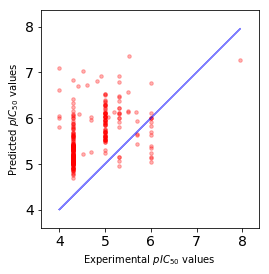

In [17]:
import matplotlib.pyplot as plt
import pylab as py

# m  = SubstructureFingerprintCount
cm = plt.cm.RdBu

x_test = np.array(Y_ext)
y_test = np.array(prediction_ext11)
py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
        c='r', cmap=cm ,edgecolors='r') 

# plot real values
#py.scatter(x_test, Y_ext, s=50, marker='.', alpha=0.3,
        #c='b', cmap=cm ,edgecolors='b') 
# calc the trendline
z = np.polyfit(x_test, Y_ext, 1)
p = np.poly1d(z)
py.plot(x_test,p(x_test),"b", alpha=0.5)

plt.legend(loc=2,prop={'size':6})
plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)

plt.gca().set_aspect('equal', adjustable='box')

min_axis = np.min(np.concatenate([x_test, y_test], axis=0))
max_axis = np.max(np.concatenate([x_test, y_test], axis=0))

plt.xlim([(min_axis*0.9),(max_axis*1.05)])
plt.ylim([(min_axis*0.9),(max_axis*1.05)])
plt.tick_params(axis='both', which='major', labelsize=14)

# Save plot to file
plt.savefig('Result/Test_gra_ER_alpha.pdf', dpi=300)
plt.show()

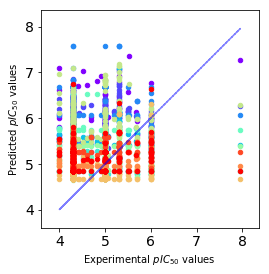

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

x = Ext.Real

colors = iter(cm.rainbow(np.linspace(0, 1, 12)))

ax = Ext.plot(x="Real", y='SubstructureFingerprintCount',kind="scatter",        color=next(colors))
Ext.plot     (x="Real", y='AtomPairs2DFingerprintCount', kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='AtomPairs2DFingerprinter',    kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='EStateFingerprinter',         kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='ExtendedFingerprinter',       kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='Fingerprinter',               kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='GraphOnlyFingerprinter',      kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='KlekotaRothFingerprintCount', kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='KlekotaRothFingerprinter',    kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='MACCSFingerprinter',          kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='PubchemFingerprinter',        kind="scatter", ax=ax, color=next(colors))
Ext.plot     (x="Real", y='SubstructureFingerprinter',   kind="scatter", ax=ax, color=next(colors))

# calc the trendline
z = np.polyfit(x, x, 1)
p = np.poly1d(z)
py.plot(x,p(x),"b--", alpha=0.5)

plt.legend(loc=2,prop={'size':6})
plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)

plt.gca().set_aspect('equal', adjustable='box')

min_axis = np.min(np.concatenate([x_test, y_test], axis=0))
max_axis = np.max(np.concatenate([x_test, y_test], axis=0))

plt.xlim([(min_axis*0.9),(max_axis*1.05)])
plt.ylim([(min_axis*0.9),(max_axis*1.05)])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('Result/Test_les_ER_alpha_all.pdf', dpi=300)
plt.show()

## Test external less than values

In [19]:
X_pre = Ext2.ix[:,2:]
X_pre = X_pre.as_matrix()
X_pre = np.array(X_pre)
X_ext = X_pre

Y_ext = Ext2["pIC50"].tolist()

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score

#Test_score = loaded_model.score(X_ext, Y_ext)
AtomPairs2DFingerprintCount.predict(X_ext)
AtomPairs2DFingerprinter.predict(X_ext)
EStateFingerprinter.predict(X_ext)
ExtendedFingerprinter.predict(X_ext)
Fingerprinter.predict(X_ext)
GraphOnlyFingerprinter.predict(X_ext)
KlekotaRothFingerprintCount.predict(X_ext)
KlekotaRothFingerprinter.predict(X_ext)
MACCSFingerprinter.predict(X_ext)
PubchemFingerprinter.predict(X_ext)
SubstructureFingerprintCount.predict(X_ext)
SubstructureFingerprinter.predict(X_ext)


prediction_ext1  = AtomPairs2DFingerprintCount.predict(X_ext)
prediction_ext2  = AtomPairs2DFingerprinter.predict(X_ext)
prediction_ext3  = EStateFingerprinter.predict(X_ext)
prediction_ext4  = ExtendedFingerprinter.predict(X_ext)
prediction_ext5  = Fingerprinter.predict(X_ext)
prediction_ext6  = GraphOnlyFingerprinter.predict(X_ext)
prediction_ext7  = KlekotaRothFingerprintCount.predict(X_ext)
prediction_ext8  = KlekotaRothFingerprinter.predict(X_ext)
prediction_ext9  = MACCSFingerprinter.predict(X_ext)
prediction_ext10 = PubchemFingerprinter.predict(X_ext)
prediction_ext11 = SubstructureFingerprintCount.predict(X_ext)
prediction_ext12 = SubstructureFingerprinter.predict(X_ext)


ext    = pd.DataFrame(Y_ext, columns=['Y_ext'])
Pext1  = pd.DataFrame(prediction_ext1 , columns=['pred Model 1 '])
Pext2  = pd.DataFrame(prediction_ext2 , columns=['pred Model 2 '])
Pext3  = pd.DataFrame(prediction_ext3 , columns=['pred Model 3 '])
Pext4  = pd.DataFrame(prediction_ext4 , columns=['pred Model 4 '])
Pext5  = pd.DataFrame(prediction_ext5 , columns=['pred Model 5 '])
Pext6  = pd.DataFrame(prediction_ext6 , columns=['pred Model 6 '])
Pext7  = pd.DataFrame(prediction_ext7 , columns=['pred Model 7 '])
Pext8  = pd.DataFrame(prediction_ext8 , columns=['pred Model 8 '])
Pext9  = pd.DataFrame(prediction_ext9 , columns=['pred Model 9 '])
Pext10 = pd.DataFrame(prediction_ext10, columns=['pred Model 10'])
Pext11 = pd.DataFrame(prediction_ext11, columns=['pred Model 11'])
Pext12 = pd.DataFrame(prediction_ext12, columns=['pred Model 12'])

result = pd.concat([ext,Pext1,Pext2,Pext3,Pext4,Pext5
                    ,Pext6,Pext7,Pext8,Pext9,Pext10,Pext11,Pext12],axis=1, 
                   join='inner').to_csv("Result/External2_pred.csv", 
                    header= ('Real','AtomPairs2DFingerprintCount'
                                 ,'AtomPairs2DFingerprinter'
                                 ,'EStateFingerprinter'
                                 ,'ExtendedFingerprinter'
                                 ,'Fingerprinter'
                                 ,'GraphOnlyFingerprinter'
                                 ,'KlekotaRothFingerprintCount'
                                 ,'KlekotaRothFingerprinter'
                                 ,'MACCSFingerprinter'
                                 ,'PubchemFingerprinter'
                                 ,'SubstructureFingerprintCount'
                                 ,'SubstructureFingerprinter')
                    , index=False)



In [21]:
Ext2  = pd.read_csv('Result/External2_pred.csv' , header = 0)
Ext2

,Real,AtomPairs2DFingerprintCount,AtomPairs2DFingerprinter,EStateFingerprinter,ExtendedFingerprinter,Fingerprinter,GraphOnlyFingerprinter,KlekotaRothFingerprintCount,KlekotaRothFingerprinter,MACCSFingerprinter,PubchemFingerprinter,SubstructureFingerprintCount,SubstructureFingerprinter
0,5.80618,5.426787,5.837599,5.098303,4.870237,4.904205,5.748457,6.345521,6.048699,5.642334,4.859867,5.031273,5.694228
1,5.80618,5.972649,5.331801,4.951816,5.040426,5.292382,5.099459,6.279100,5.967516,4.873865,5.033376,5.075039,4.793754
2,4.00000,6.111713,7.579081,6.059669,4.915473,5.435734,5.018502,5.930415,4.785221,5.376392,5.458646,4.940370,5.672814
3,4.00000,6.263317,7.579081,6.059669,4.915473,5.435734,5.018502,6.137459,4.785221,5.376392,5.458646,4.986783,5.672814
4,8.49485,5.845419,5.281777,5.182626,5.203160,5.144779,5.689480,5.861679,5.330744,4.910897,5.096047,6.336229,4.971919
5,4.00000,6.280340,7.579081,6.059669,4.915473,5.435734,5.018502,5.965553,4.785221,5.376392,5.458646,4.939063,5.672814
6,4.00000,5.499081,5.194813,5.494753,4.708510,4.972908,4.789499,5.583900,4.868411,5.191657,5.466651,5.750671,5.304336
7,4.00000,5.622617,5.437802,5.695614,4.745483,5.090434,4.942497,6.078986,4.803409,5.291443,5.347929,5.898515,5.653088
8,4.00000,6.102702,7.579081,6.059669,4.915473,5.435734,5.018502,5.930415,4.785221,5.376392,5.458646,4.893090,5.672814
9,4.00000,5.286751,5.486779,5.306639,4.902943,4.911051,4.972238,5.737661,4.817709,5.601506,5.441802,5.545840,5.315491


In [22]:
Ext2.shape

(19, 13)

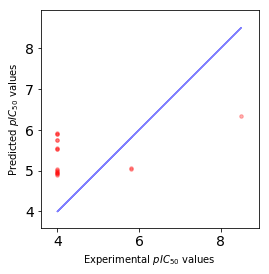

In [23]:
import matplotlib.pyplot as plt
import pylab as py

import matplotlib.pyplot as plt
import pylab as py

cm = plt.cm.RdBu

x_test = np.array(Y_ext)
y_test = np.array(prediction_ext11)
py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
        c='r', cmap=cm ,edgecolors='r') 

# plot real values
#py.scatter(x_test, Y_ext, s=50, marker='.', alpha=0.3,
        #c='b', cmap=cm ,edgecolors='b') 
# calc the trendline
z = np.polyfit(x_test, Y_ext, 1)
p = np.poly1d(z)
py.plot(x_test,p(x_test),"b", alpha=0.5)

plt.legend(loc=2,prop={'size':6})
plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)

plt.gca().set_aspect('equal', adjustable='box')

min_axis = np.min(np.concatenate([x_test, y_test], axis=0))
max_axis = np.max(np.concatenate([x_test, y_test], axis=0))

plt.xlim([(min_axis*0.9),(max_axis*1.05)])
plt.ylim([(min_axis*0.9),(max_axis*1.05)])
plt.tick_params(axis='both', which='major', labelsize=14)

# Save plot to file
plt.savefig('Result/Test_les_ER_alpha.pdf', dpi=300)
plt.show()

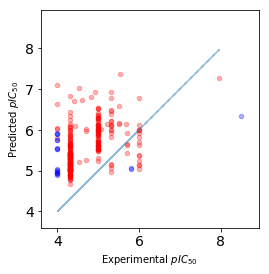

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

x = Ext.Real
x2 = Ext2.Real

colors = iter(cm.rainbow(np.linspace(0, 1, 12)))

ax = Ext.plot (x="Real", y='SubstructureFingerprintCount',kind="scatter",  c='r', alpha=0.3, edgecolors='r')
Ext2.plot     (x="Real", y='SubstructureFingerprintCount', kind="scatter", ax=ax, c='b', alpha=0.3, edgecolors='b')

# calc the trendline
z = np.polyfit(x, x, 1)
p = np.poly1d(z)
py.plot(x,p(x),"--", alpha=0.5)

plt.legend(loc=2,prop={'size':6})
plt.xlabel("Experimental $pIC_{50}$", fontsize=10)
plt.ylabel("Predicted $pIC_{50}$", fontsize=10)

plt.gca().set_aspect('equal', adjustable='box')

min_axis = np.min(np.concatenate([x_test, y_test], axis=0))
max_axis = np.max(np.concatenate([x_test, y_test], axis=0))

plt.xlim([(min_axis*0.9),(max_axis*1.05)])
plt.ylim([(min_axis*0.9),(max_axis*1.05)])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('Result/Test_ER_alpha_all.pdf', dpi=300)
plt.show()

In [25]:
raw1.head(2)

,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,2.57,NaN,-2.24,1.25,2.33,CHEMBL192325,No,C15H10O4,254.24,0.0,...,0.0,0.0,0.021739,0.021739,0.008772,0.333333,0.0,0.0,0.0,0.129870
1,12.76,4.54,3.13,3.13,2.68,CHEMBL1331671,No,C17H14ClN3O2,327.76,0.0,...,0.0,0.0,0.028986,0.028986,0.035088,0.000000,0.0,0.0,0.0,0.142857


In [26]:
raw2.head(2)

,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,8.19,NaN,2.06,2.15,1.24,CHEMBL1532515,No,C17H22N4O4S,378.45,0,...,0.0,0.0,0.578947,0.578947,0.666667,0.0,0.0,0.0,0.0,0.214286
1,10.70,1.94,0.63,0.63,1.93,CHEMBL1566820,No,C18H19N5O3S,385.44,0,...,0.0,0.0,0.315789,0.315789,1.000000,0.0,0.0,0.0,0.0,0.571429


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
# Plot the Figures Inline
%matplotlib inline


def PCA_plot(data):
    # PCA's components graphed in 2D and 3D
    # Apply Scaling 
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.preprocessing import StandardScaler
    from matplotlib import pyplot as plt
    data_pca = data
    
    # Apply Scaling 
    X = data_pca.drop('values', axis=1).as_matrix().astype(np.float)
    y = data_pca['values'].values
    
    # Formatting
    target_names = [">","<"]
    colors = ['red','blue']
    lw = 2
    alpha = 0.3

    # 2 Components PCA
    plt.style.use('seaborn-whitegrid')
    plt.figure(2, figsize=(20, 8))

    plt.subplot(1, 2, 1)
    pca = PCA(n_components=2)
    X_std = StandardScaler().fit_transform(X)
    X_r = pca.fit_transform(X_std)
    #X_r = pca.fit(X).transform(X)
        
    for color, i, target_name in zip(colors, ['>','<'], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                    color=color, 
                    alpha=alpha, 
                    lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('First two PCA directions');

    # 3 Components PCA
    ax = plt.subplot(1, 2, 2, projection='3d')

    pca = PCA(n_components=3)
    X_reduced = pca.fit_transform(X_std)
    for color, i, target_name in zip(colors, ['>','<'], target_names):
        ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
                   color=color,
                   alpha=alpha,
                   lw=lw, 
                   label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")

    # rotate the axes
    ax.view_init(30, 10)
    plt.savefig('Result/Testing PCA.pdf', dpi=300)

In [28]:
list(raw1)

['acdAcidicPka',
 'acdBasicPka',
 'acdLogd',
 'acdLogp',
 'alogp',
 'chemblId',
 'knownDrug',
 'molecularFormula',
 'molecularWeight',
 'numRo5Violations',
 'passesRuleOfThree',
 'preferredCompoundName',
 'rotatableBonds',
 'smiles',
 'species',
 'stdInChiKey',
 'synonyms',
 'activity_comment',
 'assay_chemblid',
 'assay_description',
 'assay_type',
 'bioactivity_type',
 'name_in_reference',
 'operator',
 'organism',
 'parent_cmpd_chemblid',
 'reference',
 'target_chemblid',
 'target_confidence',
 'target_name',
 'units',
 'STATUS',
 'SMILES_desalt',
 'pIC50',
 'SubFPC1',
 'SubFPC2',
 'SubFPC3',
 'SubFPC4',
 'SubFPC5',
 'SubFPC6',
 'SubFPC7',
 'SubFPC8',
 'SubFPC9',
 'SubFPC10',
 'SubFPC11',
 'SubFPC12',
 'SubFPC13',
 'SubFPC14',
 'SubFPC15',
 'SubFPC16',
 'SubFPC17',
 'SubFPC18',
 'SubFPC19',
 'SubFPC20',
 'SubFPC21',
 'SubFPC22',
 'SubFPC23',
 'SubFPC24',
 'SubFPC25',
 'SubFPC26',
 'SubFPC27',
 'SubFPC28',
 'SubFPC29',
 'SubFPC30',
 'SubFPC31',
 'SubFPC32',
 'SubFPC33',
 'SubFPC34',


In [29]:
pca1 = raw1[raw1.columns[34:]]
pca1.head(2)

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.021739,0.021739,0.008772,0.333333,0.0,0.0,0.0,0.129870
1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.028986,0.028986,0.035088,0.000000,0.0,0.0,0.0,0.142857


In [30]:
pca2 = raw2[raw2.columns[32:]]
pca2.head(2)

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,0.5,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.578947,0.578947,0.666667,0.0,0.0,0.0,0.0,0.214286
1,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.315789,0.315789,1.000000,0.0,0.0,0.0,0.0,0.571429


In [31]:
pca1['values'] = ">"
pca2['values'] = "<"

frames = [pca1,pca2]
pca = pd.concat(frames)
pca.head(2)

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307,values
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.021739,0.021739,0.008772,0.333333,0.0,0.0,0.0,0.129870,>
1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.028986,0.028986,0.035088,0.000000,0.0,0.0,0.0,0.142857,>


In [32]:
pca.shape

(302, 308)

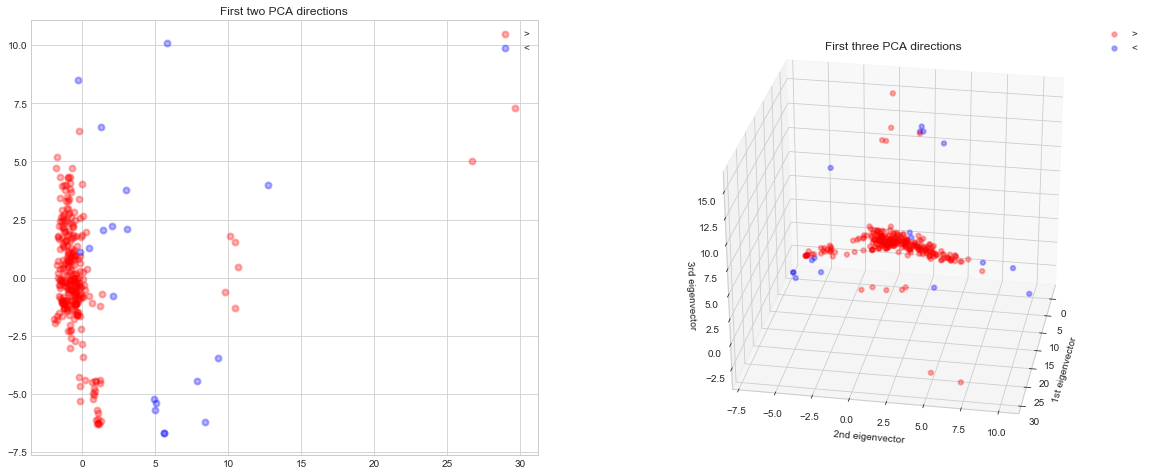

In [33]:
PCA_plot(pca)

In [34]:
train  = pd.read_csv('QSAR/ER_alpha_SubstructureFingerprintCount.csv' , header = 0)
train.head(3)

,chemblId,pIC50,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,CHEMBL370037,8.221849,0.166667,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.085714,0.085714,0.04,0.25,0.0,0.0,0.0,0.354839
1,CHEMBL189073,5.762708,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.057143,0.057143,0.00,0.00,0.0,0.0,0.0,0.419355
2,CHEMBL365290,6.943095,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.085714,0.085714,0.00,0.00,0.0,0.0,0.0,0.322581


In [35]:
pca3 = train[train.columns[2:]]
pca3.head(2)

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,0.166667,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.085714,0.085714,0.04,0.25,0.0,0.0,0.0,0.354839
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.057143,0.057143,0.00,0.00,0.0,0.0,0.0,0.419355


In [36]:
pca3['values'] = "Training"

frames = [pca1,pca2,pca3]
pca = pd.concat(frames)
pca.head(2)

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307,values
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.021739,0.021739,0.008772,0.333333,0.0,0.0,0.0,0.129870,>
1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.028986,0.028986,0.035088,0.000000,0.0,0.0,0.0,0.142857,>


In [37]:
def PCA_plot(data):
    # PCA's components graphed in 2D and 3D
    # Apply Scaling 
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.preprocessing import StandardScaler
    from matplotlib import pyplot as plt
    data_pca = data
    
    # Apply Scaling 
    X = data_pca.drop('values', axis=1).as_matrix().astype(np.float)
    y = data_pca['values'].values
    
    # Formatting
    target_names = [">","<","Training"]
    colors = ['red','blue',"green"]
    lw = 2
    alpha = 0.3

    # 2 Components PCA
    plt.style.use('seaborn-whitegrid')
    plt.figure(2, figsize=(20, 8))

    plt.subplot(1, 2, 1)
    pca = PCA(n_components=2)
    X_std = StandardScaler().fit_transform(X)
    X_r = pca.fit_transform(X_std)
    #X_r = pca.fit(X).transform(X)
        
    for color, i, target_name in zip(colors, [">","<","Training"], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                    color=color, 
                    alpha=alpha, 
                    lw=lw,
                    label=target_name)
    plt.xlabel("PC1", fontsize=12)
    plt.ylabel("PC2", fontsize=12)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('First two PCA directions');

    # 3 Components PCA
    ax = plt.subplot(1, 2, 2, projection='3d')

    pca = PCA(n_components=3)
    X_reduced = pca.fit_transform(X_std)
    for color, i, target_name in zip(colors, [">","<","Training"], target_names):
        ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
                   color=color,
                   alpha=alpha,
                   lw=lw, 
                   label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("PC1", fontsize=12)
    ax.set_ylabel("PC2", fontsize=12)
    ax.set_zlabel("PC3", fontsize=12)

    # rotate the axes
    ax.view_init(30, 10)
    plt.savefig('Result/PCA.pdf', dpi=300)

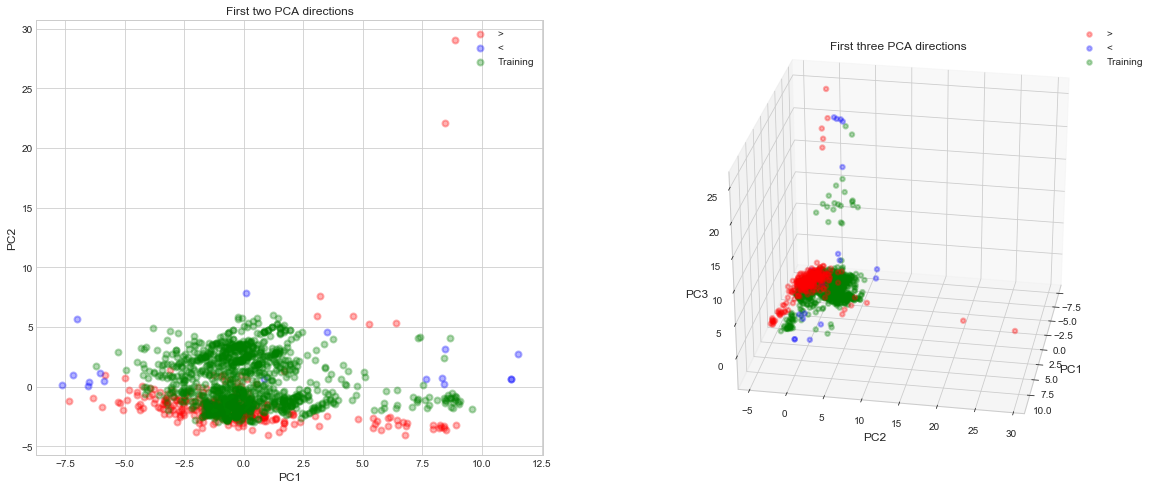

In [38]:
PCA_plot(pca)

In [39]:
pca .to_csv('SubFiles/PCA data.csv' , sep=',' ,index=False)